### Import packages

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import os
import sys
import dill
import yaml
import numpy as np
import pandas as pd
import ast
import seaborn as sns

from collections import Iterable
from collections import Counter
sns.set(style='ticks')

### Utility functions

In [2]:
def flatten(x):
    result = []
    for el in x:
        if hasattr(el, "__iter__") and not isinstance(el, str):
            result.extend(flatten(el))
        else:
            result.append(el)
    return result

In [3]:
def create_skills_list(df_user):
    skills_one_nested_list = df_user['skills'].tolist()
    skills_one_list = flatten(skills_one_nested_list)
    return list(skills_one_list)

In [55]:
def create_skills_frequencies_dictionary(skills_list):
    skills_dict_counter = {}
    for skill in skills_list:
        if skill not in skills_dict_counter:
            skills_dict_counter[skill] = 0
        skills_dict_counter[skill] += 1
        
    return skills_dict_counter

In [56]:
def convert_skills_to_frequencies(skills_list):
    skills_dict_counter = create_skills_frequencies_dictionary(skills_list)
    skills_occurrences = list(skills_dict_counter.values())
    return skills_occurrences

In [57]:
def set_style():
    # This sets reasonable defaults for font size for a paper
    sns.set_context("paper")    
    # Set the font to be serif
    sns.set(font='serif')#, rc={'text.usetex' : True})   
    # Make the background white, and specify the specific font family
    sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
    })
    # Set tick size for axes
    sns.set_style("ticks", {"xtick.major.size": 6, "ytick.major.size": 6})

In [58]:
def set_size(fig, width=12, height=9):
    fig.set_size_inches(width, height)
    plt.tight_layout()

In [59]:
def save_fig(fig, filename):
    fig.savefig(os.path.join(VIZ_DIR, filename), dpi=600, format='pdf', bbox_inches='tight')

In [60]:
def plot_skills_histogram(alist):      
    bins = 100
    title = "Distribution of skill occurrences in users."    
    width = 0.8
    xmin = min(alist) - 1; xmax = max(alist) + 1
    
    fig = plt.gcf()
    (n, bins, patches) = plt.hist(alist, bins=bins, color="#3F5D7D", normed=False,\
                                  histtype='bar')
    
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.xlabel('Frequency',fontsize=16)
    plt.ylabel('Skills',fontsize=16)
    plt.xlim([xmin-10, xmax+10])
    plt.yscale('log')

    plt.title(title)
    
    return fig

### Pre-processing of skill occurrences

In [61]:
generic = lambda x: ast.literal_eval(x)
df_user = pd.read_csv("/Users/smnikolakaki/Desktop/research/data-x/submodular-optimization/guru/guru_user_df.csv",
                header=0,
                index_col=False,
                converters={'skills': generic})

In [62]:
skills_user_list = create_skills_list(df_user)
print('Total number of skills:',len(skills_user_list))
skills_set = list(set(skills_user_list))
print('Number of distinct skills in users:',len(skills_set))

Total number of skills: 64724
Number of distinct skills in users: 4182


In [63]:
df_skills = pd.read_csv("/Users/smnikolakaki/Desktop/research/data-x/submodular-optimization/guru/guru_skill_df.csv",
                header=0,
                index_col=False)

In [64]:
skills_list = df_skills['skill'].tolist()
print('Number of distinct skills in skills:',len(skills_list))
skill_dict = {}
for skill in skills_list:
    if skill not in skill_dict:
        skill_dict[skill] = 0
    skill_dict[skill] += 1

Number of distinct skills in skills: 1639


In [65]:
skills_list = [x for x in skills_user_list if x in skill_dict]
skills_occurrences = convert_skills_to_frequencies(skills_list)

### Plot histogram

/opt/anaconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


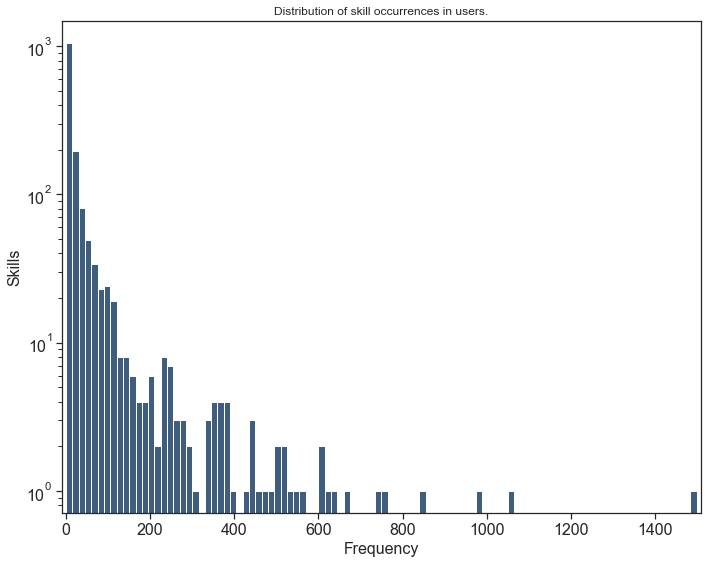

In [66]:
set_style()
fig = plot_skills_histogram(skills_occurrences)
set_size(fig, 10, 8)

### Plot histogram of sampled users

In [67]:
def sample_users(num_users,fraction=1.0):
    if fraction < 1.0:
        num_sampled_users = int(fraction * num_users)
        sampled_users = np.random.choice(num_users, size=num_sampled_users, replace=False)
        E = set(sampled_users)
    else:
        E = set(np.arange(num_users))
       
    return E

In [68]:
def convert_sampled_skills_to_frequencies(num_users,fraction=1.0):
    E = sample_users(num_users,users_sample_fraction)
    list_of_available_skills = [user_skills_dict[x] for x in E]
    list_of_available_skills = [y for x in list_of_available_skills for y in x]
    skills_occurrences = convert_skills_to_frequencies(list_of_available_skills)
    return skills_occurrences

In [69]:
num_users = len(df_user)
skills_nested_list = df_user['skills'].tolist()
users_list = df_user['user_id'].tolist()
user_skills_dict = {}
for i, user in enumerate(users_list):
    user_skills_dict[user] = skills_nested_list[i]

Total number of skills: 921
Num of skills with 2 or less occurrences: 694
% of skills with 2 or less occurrences: 75.3528773072747
Num of skills with 200 or more occurrences: 1
% of skills with 200 or more occurrences: 0.10857763300760044


/opt/anaconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


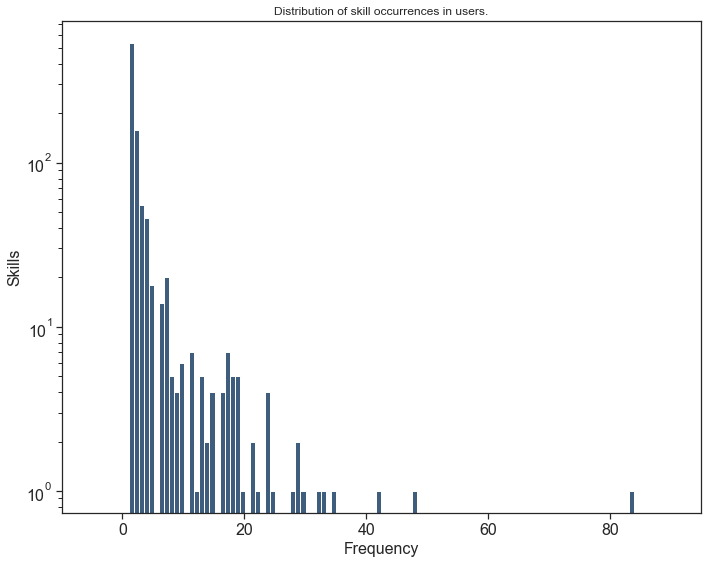

In [100]:
users_sample_fraction = 0.05
skill_occurrences = convert_sampled_skills_to_frequencies(num_users,users_sample_fraction)
skill_occurrences_sorted = sorted(skill_occurrences)
print('Total number of skills:',len(skill_occurrences))
total_num_of_skills = len(skill_occurrences)
num_of_skills_with_less_than_3_occurrences = len([x for x in skill_occurrences_sorted if x < 3])
num_of_skills_with_more_than_200_occurrences = len([x for x in skill_occurrences_sorted if x > 50])
print('Num of skills with 2 or less occurrences:',num_of_skills_with_less_than_3_occurrences)
print('% of skills with 2 or less occurrences:',(num_of_skills_with_less_than_3_occurrences/total_num_of_skills)*100)
print('Num of skills with 200 or more occurrences:',num_of_skills_with_more_than_200_occurrences)
print('% of skills with 200 or more occurrences:',(num_of_skills_with_more_than_200_occurrences/total_num_of_skills)*100)
set_style()
fig = plot_skills_histogram(skill_occurrences)
set_size(fig, 10, 8)

Total number of skills: 1995
Num of skills with 2 or less occurrences: 1294
% of skills with 2 or less occurrences: 64.86215538847118
Num of skills with 200 or more occurrences: 57
% of skills with 200 or more occurrences: 2.857142857142857


/opt/anaconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


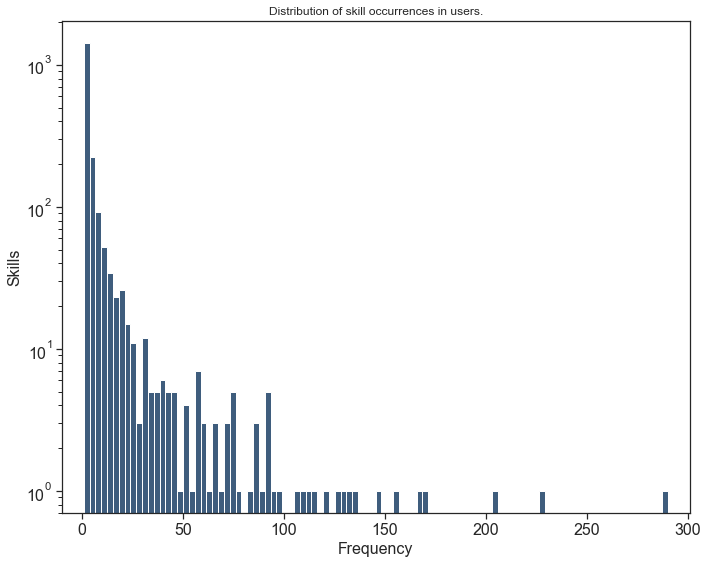

In [99]:
users_sample_fraction = 0.2
skill_occurrences = convert_sampled_skills_to_frequencies(num_users,users_sample_fraction)
skill_occurrences_sorted = sorted(skill_occurrences)
print('Total number of skills:',len(skill_occurrences))
total_num_of_skills = len(skill_occurrences)
num_of_skills_with_less_than_3_occurrences = len([x for x in skill_occurrences_sorted if x < 3])
num_of_skills_with_more_than_200_occurrences = len([x for x in skill_occurrences_sorted if x > 50])
print('Num of skills with 2 or less occurrences:',num_of_skills_with_less_than_3_occurrences)
print('% of skills with 2 or less occurrences:',(num_of_skills_with_less_than_3_occurrences/total_num_of_skills)*100)
print('Num of skills with 200 or more occurrences:',num_of_skills_with_more_than_200_occurrences)
print('% of skills with 200 or more occurrences:',(num_of_skills_with_more_than_200_occurrences/total_num_of_skills)*100)
set_style()
fig = plot_skills_histogram(skill_occurrences)
set_size(fig, 10, 8)

Total number of skills: 1415
Num of skills with 2 or less occurrences: 953
% of skills with 2 or less occurrences: 67.34982332155477
Num of skills with 200 or more occurrences: 19
% of skills with 200 or more occurrences: 1.342756183745583


/opt/anaconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


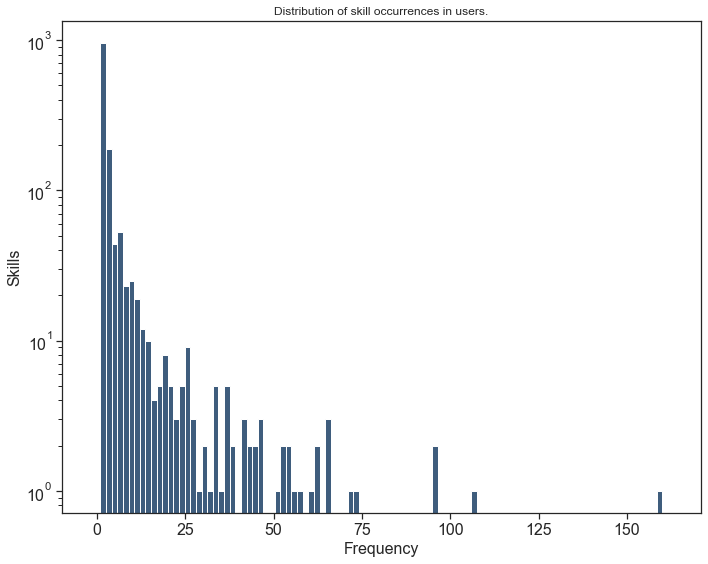

In [98]:
users_sample_fraction = 0.1
skill_occurrences = convert_sampled_skills_to_frequencies(num_users,users_sample_fraction)
skill_occurrences_sorted = sorted(skill_occurrences)
print('Total number of skills:',len(skill_occurrences))
total_num_of_skills = len(skill_occurrences)
num_of_skills_with_less_than_3_occurrences = len([x for x in skill_occurrences_sorted if x < 3])
num_of_skills_with_more_than_200_occurrences = len([x for x in skill_occurrences_sorted if x > 50])
print('Num of skills with 2 or less occurrences:',num_of_skills_with_less_than_3_occurrences)
print('% of skills with 2 or less occurrences:',(num_of_skills_with_less_than_3_occurrences/total_num_of_skills)*100)
print('Num of skills with 200 or more occurrences:',num_of_skills_with_more_than_200_occurrences)
print('% of skills with 200 or more occurrences:',(num_of_skills_with_more_than_200_occurrences/total_num_of_skills)*100)
set_style()
fig = plot_skills_histogram(skill_occurrences)
set_size(fig, 10, 8)